# Tetramer Self-Assembly

Dou, Dhatt-Gauthier, Bishop published a Markov model representing the self-assembly of a tetramer (Curr. Opin. Sol. State Mat. Sci. 23 (2019)). There are $M=8$ states in this model. 
State 1 represents the active monomer, and state 4 represents the fully-assembled tetramer. This model's parameters are as follows. 

$c_{a}$ is the concentration of the assembled structure

$c_{i}$ is the concentration of the monomers

$k_{a}$ is the kinetic rate constant for the driven process

$k_{i}$ is the kinetic rate constant for the undriven process

$\epsilon$ is the interaction energy between monomers

$F$ is the free energy difference between energy levels

$A$ is the affinity.

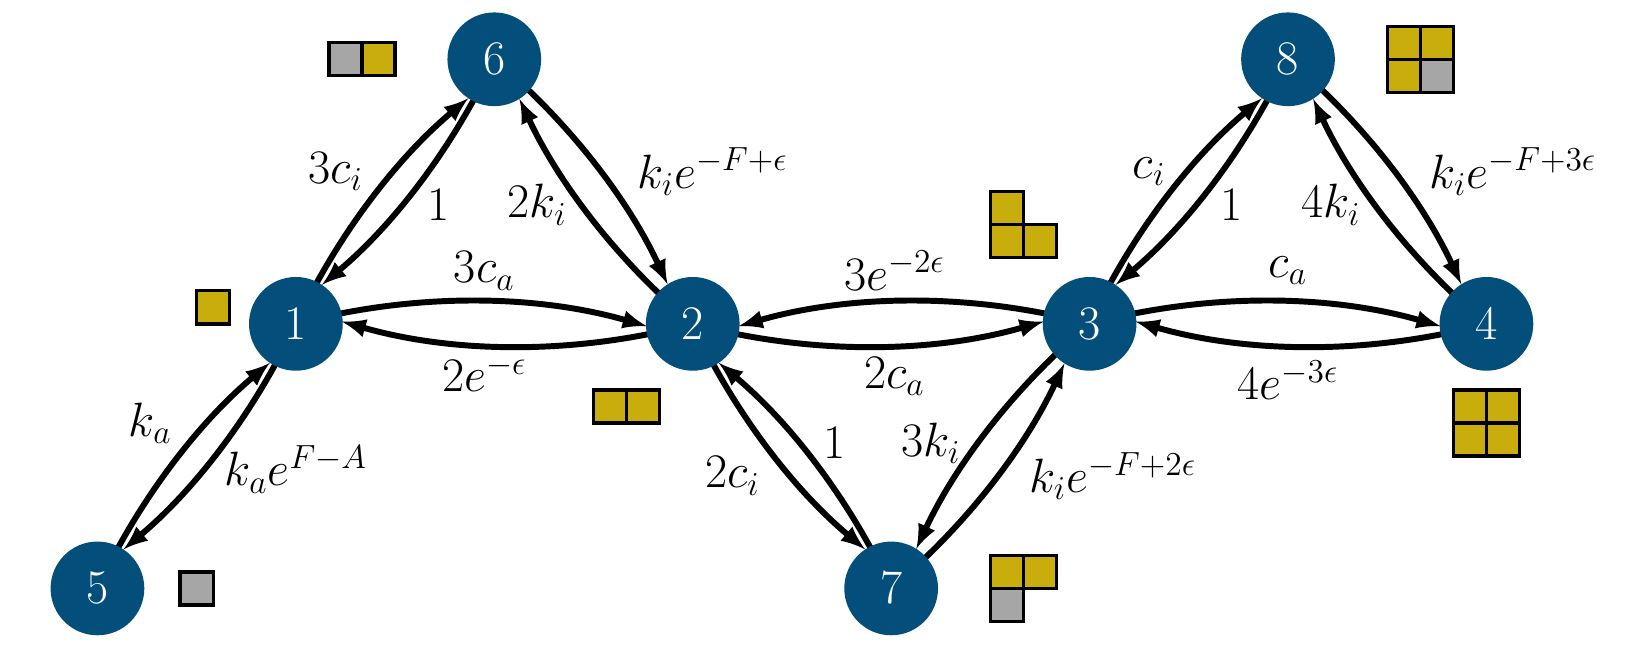
The transition rate matrix (without the escape rates) for this model is
\begin{equation}
\left( D \right) = \left(
\begin{matrix}
0 & 2e^{-\epsilon} & 0 & 0 & k_{a} & 1 & 0 & 0 \\
3c_{a} & 0 & 3e^{-2\epsilon} & 0 & 0 & k_{i}e^{\epsilon-F} & 1 & 0 \\
0 & 2c_{a} & 0 & 4e^{-3\epsilon} & 0 & 0 & k_{i}e^{2\epsilon-F} & 1 \\
0 & 0 & c_{a} & 0 & 0 & 0 & 0 & k_{i}e^{3\epsilon-F} \\
k_{a}e^{F-A} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
3c_{i} & 2k_{i} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 2c_{i} & 3k_{i} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & c_{i} & 4k_{i} & 0 & 0 & 0 & 0
\end{matrix}\right)
\end{equation}

Let us now assume that we want this ratchet to produce large amounts of work/power very quickly and with minimal cost. The speed, dissipation, and yield can be quantified over a path-- a sequence of time-ordered states representing the path a particle takes between these two electrodes and the charge of that particle.
For some path $\mathcal{C}_{n}=x_{0},x_{1},x_{2},...,x_{n-1},x_{n}$, the speed of that path is given by the sum of the mean time waiting in each state along the path:
\begin{equation}
\langle 1 / \tau \rangle_{\mathcal{C}_{n}}=\sum_{i=0}^{n} \frac{1}{w_{x_{i}}}
\end{equation}
The entropy dissipated by traversal of a single path is given by the negative of the entropy flow:
\begin{equation}
-s_{e}[\mathcal{C}_{n}]=-\ln \frac{\prod_{i=1}^{n} w(x_{i} \vert x_{i-1})}{\prod_{j-1}^{n} w(x_{j-1} \vert x_{j})}
\end{equation}
The yield can be defined by the probability of a path.

These path-level observables can be averaged over a group of paths, an ensemble.
We are interested in the trend of these observables in time, so we will create groups of paths that are binned in time based on their mean occurrence time $\langle \tau \rangle_{\mathcal{C}_{n}}$. The value of each paths' mean occurrence time will fall into a single uniform-length ($\Delta t$) time bin. The observables $\mathcal{O}_{\mathcal{C}_{n}}$ of these paths can then be averaged to a single value representing that point in time:
\begin{equation}
\langle \mathcal{O} \rangle_{t}=\sum_{t}^{t+\Delta t} \mathcal{O}_{\mathcal{C}_{n}} p(\mathcal{C}_{n},\langle \tau \rangle_{\mathcal{C}_{n}})
\end{equation}
This yields a time series of values of each observable. These time series are plotted below for the speed, dissipation, and yield.

Number of paths is 1566
Length of longest path is 10


Text(0.5, 0, 'Time')

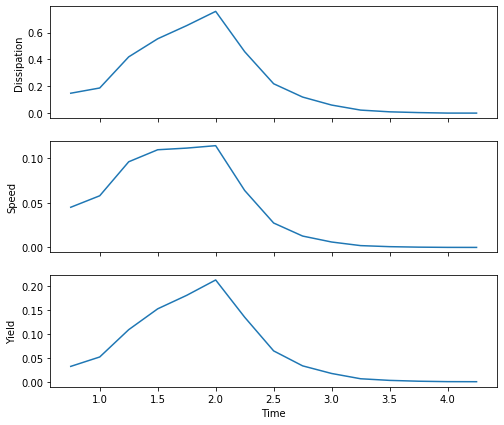

In [9]:
import math
import matplotlib
import matplotlib.pyplot as plt

# Parameter values
A = 1
F = 1
eps = 1
ca = 1
ci = 1
ka = 1
ki = 1

# Size of time bins
dt = 0.25

#Declarations
temp = []
paths = []
allpaths = []
newpaths = []
prob = []
time = []
speed = []
diss = []
R = []
wx = []
t_time = []
t_speed = []
t_diss = []
t_mtime = []
t_prob = []
occ = []
ef = []
probs = []

# Path generation
paths = [[1,2],[1,5],[1,6]]
nmax = 10
npath = 0
for i in range(2,nmax):
    newpaths.clear()
    for j in range(0,len(paths),1):
        if (paths[j][-1] == 1):
            temp.clear()
            temp = list(paths[j])
            temp.append(2)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(5)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(6)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 2):
            temp.clear()
            temp = list(paths[j])
            temp.append(1)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(3)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(6)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(7)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 3):
            temp.clear()
            temp = list(paths[j])
            temp.append(2)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(4)
            newpaths.append(list(temp))
            allpaths.append(list(temp))
            npath+=1
            del temp[-1]
            temp.append(7)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(8)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 4):
            temp.clear()
            temp = list(paths[j])
            temp.append(3)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(8)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 5):
            temp.clear()
            temp = list(paths[j])
            temp.append(1)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 6):
            temp.clear()
            temp = list(paths[j])
            temp.append(1)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(2)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 7):
            temp.clear()
            temp = list(paths[j])
            temp.append(2)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(3)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 8):
            temp.clear()
            temp = list(paths[j])
            temp.append(3)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(4)
            newpaths.append(list(temp))
            allpaths.append(list(temp))
            npath+=1
        else:
            print("Invalid state!\n")
    paths.clear()
    paths = list(newpaths)
            
print("Number of paths is",npath)
print("Length of longest path is",len(allpaths[-1]))
#print(allpaths)

# Rate matrix and escape rates
R = [[float(0)]*8]*8
R[0]=[float(0),float(3*ca),float(0),float(0),float(ka*math.exp(F-A)),float(3*ci),float(0),float(0)]#1
R[1]= [float(2*math.exp(-1*eps)),float(0),float(2*ci),float(0),float(0),float(2*ki),float(2*ci),float(0)]#2
R[2]= [float(0),float(3*math.exp(-2*eps)),float(0),float(ca),float(0),float(0),float(3*ki),float(ci)]#3
R[3]= [float(0),float(0),float(4*math.exp(-3*eps)),float(0),float(0),float(0),float(0),float(4*ki)]#4
R[4] = [float(ka),float(0),float(0),float(0),float(0),float(0),float(0),float(0)]#5
R[5] = [float(1),float(ki*math.exp(-F+eps)),float(0),float(0),float(0),float(0),float(0),float(0)]#6
R[6] = [float(0),float(1),float(ki*math.exp(-F+2*eps)),float(0),float(0),float(0),float(0),float(0)]#7
R[7] = [float(0),float(0),float(1),float(ki*math.exp(-F+3*eps)),float(0),float(0),float(0),float(0)]#8
wx.append(float((3*ca)+(ka*math.exp(F-A))+(3*ci)))#1
wx.append(float((2*math.exp(-1*eps))+(2*ci)+(2*ki)+(2*ci)))#2
wx.append(float((3*math.exp(-2*eps))+ca+(3*ki)+ci))#3
wx.append(float((4*math.exp(-3*eps))+(4*ki)))#4
wx.append(float(ka))#5
wx.append(float(1+(ki*math.exp(-F+eps))))#6
wx.append(float(1+(ki*math.exp(-F+2*eps))))#7
wx.append(float(1+(ki*math.exp(-F+3*eps))))#8

# Observable determination along paths
margp = 1
time = []
speed = []
diss = []
prob = []
for i in range(0,len(allpaths),1):
    time.append(float(0))
    for j in range(0,len(allpaths[i]),1):
        time[i]+=(1/wx[int(allpaths[i][j]-1)])
    speed.append(float(1/time[i]))
    prob.append(float(1))
    for j in range(1,len(allpaths[i]),1):
        prob[i] = prob[i] * float(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)]/wx[int(allpaths[i][j-1]-1)])
    diss.append(float(1))
    for j in range(1,len(allpaths[i]),1):
        extra = float(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)])
        diss[i]*=float(extra)
        extra = float(R[int(allpaths[i][j]-1)][int(allpaths[i][j-1]-1)])
        diss[i]/=float(extra)
        #diss[i]-=float(math.log(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)]/R[int(allpaths[i][j]-1)][int(allpaths[i][j-1]-1)]))
    diss[i] = float(math.log(diss[i]))

sumpr = float(0)
for i in range(0,len(allpaths),1):
    sumpr+=float(prob[i])
for i in range(0,len(allpaths),1):
    prob[i]/=float(sumpr)
    
# Average to time ensemble
nt = math.ceil(max(time)/dt)
t_time = [float(0)]*(nt+1)
for i in range(0,nt+1):
    t_time[i]=i*dt
#t_time = list(range(0,dt*nt,dt))
t_speed = [float(0)]*nt
t_diss = [float(0)]*nt
t_mtime = [float(0)]*nt
t_prob = [float(0)]*nt
for i in range(0,len(t_time)-1,1):
    occ.clear()
    ef.clear()
    probs.clear()
    for j in range(0,len(allpaths),1):
        if (time[j] >= t_time[i]) and (time[j] <= t_time[i+1]):
            occ.append(float(time[j]))
            ef.append(float(diss[j]))
            probs.append(float(prob[j]))
    t_speed[i] = float(0)
    t_diss[i] = float(0)
    t_mtime[i] = float(0)
    t_prob[i] = float(0)
    for j in range(0,len(occ),1):
        extra = float(probs[j] * occ[j])
        t_mtime[i]+=float(extra)
        if occ[j] > 0:
            extra=float(probs[j]/occ[j])
            t_speed[i]+=float(extra)
        extra=float(probs[j] * ef[j])
        t_diss[i]+=float(extra)
        t_prob[i]+=float(probs[j])
        
# Time ensemble neglecting zero elements
finaltimes = list(t_time)
del finaltimes[0]
for i in range(len(t_speed)-1,-1,-1):
    if t_mtime[i] == 0:
        del t_speed[i]
        del t_diss[i]
        del t_mtime[i]
        del t_prob[i]
        del finaltimes[i]

# Plots
fig = plt.figure(figsize=(8,7))
ax = fig.subplots(sharex=True,sharey=False,ncols=1,nrows=3)
plt.sca(ax[0])
ax[0].plot(finaltimes,t_diss)
ax[0].set_ylabel('Dissipation')
plt.sca(ax[1])
ax[1].plot(finaltimes,t_speed)
ax[1].set_ylabel('Speed')
plt.sca(ax[2])
ax[2].plot(finaltimes,t_prob)
ax[2].set_ylabel('Yield')
ax[2].set_xlabel('Time')

Each of our three pertinent observables has a trend in time, shown above. Each of these observables has a similar profile of their trend in time, first increasing then decreasing. The decrease in later times can be discarded as an effect of using only short paths (by number of states). Therefore, dissipation increases in time, speed increases in time, and yield increases in time. This means that getting a large yield quickly is entirely possible but only at the cost of increasing the dissipation.